In [63]:
import numpy as np
import pandas as pd
import pickle

In [64]:
import cv2

In [65]:
df = pd.read_csv(r'E:\aptos2019-blindness-detection\train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
prefix = 'E:\\aptos2019-blindness-detection\\train_images\\'
ext = '.png'

(2136, 3216, 3)

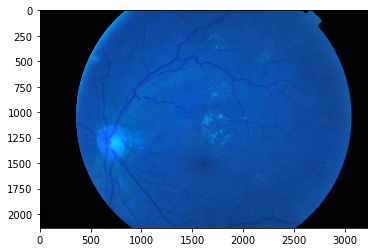

In [25]:
im1 = cv2.imread(r'E:\\aptos2019-blindness-detection\\train_images\\00a8624548a9.png')
plt.imshow(im1)
im1.shape

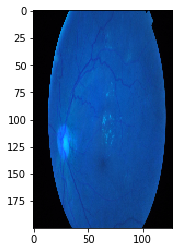

In [27]:
im2 = cv2.resize(im1, (128,200))
plt.imshow(im2)

In [9]:
labels = []
images = []
for i,row in df.iterrows():
    file_path = prefix+row['id_code']+ext
    labels.append(row['diagnosis'])
    img = cv2.imread(file_path)
    dim = (64,64)
    if i%100 == 0:
        print(i)
    resized = cv2.resize(img, dim)
    images.append(resized)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


In [12]:
images = np.array(images)
labels = np.array(labels)
images.shape, labels.shape

((3662, 64, 64, 3), (3662,))

In [72]:
images[0]

array([[[1, 1, 1],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [1, 0, 2],
        [2, 2, 2],
        [1, 1, 1]],

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 0, 2],
        [1, 0, 2],
        [2, 2, 2],
        ...,
        [1, 0, 2],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 0, 2],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [2, 2, 2],
        [1, 1, 1]]], dtype=uint8)

In [13]:
with open('images.pkl','wb') as f:
    pickle.dump(images,f)
    
with open('labels.pkl','wb') as f:
    pickle.dump(labels,f)

In [4]:
with open('images.pkl','rb') as f:
    images = pickle.load(f)
    
with open('labels.pkl','rb') as f:
    labels = pickle.load(f)

In [5]:
images.shape, labels.shape

((3662, 64, 64, 3), (3662,))

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [16]:
labels

array([2, 4, 1, ..., 2, 0, 2])

In [7]:
df1 = pd.DataFrame(labels,columns=['Label'])
df1.head()

,Label
0,2
1,4
2,1
3,0
4,0


In [8]:
df5 = df1["Label"].astype('category')
df6=pd.DataFrame(df5)

In [9]:
images.shape

(3662, 64, 64, 3)

In [10]:
images[0].shape

(64, 64, 3)

In [20]:
df6.Label.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=False)

In [11]:
dummies = pd.get_dummies(df6.Label)
labels1 = pd.DataFrame(dummies)

In [12]:
labels1.values

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [13]:
labels1.shape

(3662, 5)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam

In [19]:
classifier = Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation= 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
#classifier.add(Dense(units=128,activation='relu'))
#classifier.add(Dense(units=64,activation='relu'))
#classifier.add(Dense(units=5,activation='softmax'))
#opt = SGD(lr=0.1)
#classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
#classifier.fit(x=images.reshape(-1,64,64,3),y=labels1.values,batch_size=32,epochs=50)

Train on 3662 samples
Epoch 1/50
3662/3662 [==============================] - 6s 2ms/sample - loss: 6.3204 - accuracy: 0.6150
Epoch 2/50
3662/3662 [==============================] - 3s 940us/sample - loss: 0.8238 - accuracy: 0.7064
Epoch 3/50
3662/3662 [==============================] - 3s 927us/sample - loss: 0.7457 - accuracy: 0.7409
Epoch 4/50
3662/3662 [==============================] - 3s 875us/sample - loss: 0.7021 - accuracy: 0.7482
Epoch 5/50
3662/3662 [==============================] - 3s 948us/sample - loss: 0.6740 - accuracy: 0.7559
Epoch 6/50
3662/3662 [==============================] - 3s 760us/sample - loss: 0.6250 - accuracy: 0.7712
Epoch 7/50
3662/3662 [==============================] - 3s 921us/sample - loss: 0.5772 - accuracy: 0.7840
Epoch 8/50
3662/3662 [==============================] - 3s 744us/sample - loss: 0.5490 - accuracy: 0.7996
Epoch 9/50
3662/3662 [==============================] - 3s 889us/sample - loss: 0.5092 - accuracy: 0.8157
Epoch 10/50
3662/3662 [===

In [18]:
#y_p = classifier.predict(images[0].reshape(-1,64,64,3).astype(np.float16))
#print(y_p)

[[1.6730247e-30 5.4176956e-15 1.0000000e+00 2.9757802e-10 7.8091125e-09]]


In [20]:
y_feature = classifier.predict(x=images.reshape(-1,64,64,3))
print(y_feature)

[[ 0.          0.          0.2737981  ...  8.587248    0.
  18.070227  ]
 [ 0.          0.          0.74530417 ... 12.952677    0.
  30.979559  ]
 [ 0.          0.          0.43959987 ... 13.832192    3.356829
  33.39747   ]
 ...
 [ 0.          0.          0.6151741  ... 12.4355955   0.
  21.465544  ]
 [ 0.41353148  0.10743456  0.1599573  ... 11.478159    0.23333512
  28.318588  ]
 [ 0.          0.04897952  0.60996366 ...  3.250145    0.
   6.709407  ]]


In [21]:
y_feature.shape

(3662, 3200)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=70)
df_pca = pca.fit_transform(y_feature)

In [56]:
df_pca.shape

(3662, 70)

In [57]:
sum(pca.explained_variance_ratio_)

0.975638853647979

In [30]:
y = x=images.reshape(-1,64,64,3)
y.shape

(3662, 64, 64, 3)

In [60]:
features = pd.DataFrame(df_pca)
features

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-369.287659,-323.314514,8.136831,340.857330,-181.888123,-157.508423,-13.893441,26.001890,-70.187210,22.864182,...,-0.294236,-4.203423,-19.918495,17.299986,-17.646187,22.827335,8.905634,3.963226,-3.944826,28.554115
1,346.013489,45.460094,349.281342,301.581055,-229.130478,-72.829201,-73.399773,20.071264,55.510796,5.701949,...,0.265205,9.485531,0.017722,-0.891614,-13.776937,-2.379689,-14.831209,8.668957,13.657041,0.689377
2,78.546936,-352.411163,38.635601,-95.416496,-177.867584,192.933823,-118.246964,-4.480050,4.993004,-27.349741,...,4.361281,-1.412789,0.907632,3.109173,14.208907,-2.463489,-8.946894,12.389144,1.327453,10.184634
3,563.589478,147.964584,-232.092056,18.887470,276.006653,-136.597504,46.722614,-36.745735,-6.813028,-80.120552,...,-7.830704,-3.543626,4.539934,2.338501,-3.886925,-7.722713,5.292548,6.791864,-1.083135,15.778393
4,-1267.611206,36.762524,-300.397736,4.813865,-157.951965,-116.526520,-124.283806,-109.454826,-61.096313,-27.962049,...,2.985404,-11.909810,0.756623,-14.951731,-9.131585,-2.282393,1.008551,-15.255521,-15.958002,21.690529
5,-50.884068,-172.654968,-7.050712,59.751038,-55.246765,-55.482094,75.920914,38.165958,-34.589382,68.196487,...,20.653435,-6.830629,-6.433386,-1.600717,-2.271236,6.661789,11.442963,8.988207,-5.982787,17.496227
6,-865.680176,-494.063019,70.913475,27.952911,280.713013,-43.351814,152.390015,-61.710438,-37.869457,16.633118,...,-3.268663,-3.363220,-0.182298,11.798167,-5.863667,7.941531,-18.675806,-2.376265,11.876850,11.453166
7,326.678802,91.711029,86.217224,431.355316,-220.749283,-82.594612,-106.276909,99.835060,0.352314,-21.759928,...,-6.955100,-15.795041,-2.795753,10.035080,-5.116927,-11.121982,-14.869092,7.675373,17.230383,12.248763
8,-924.229309,-574.931824,125.205437,103.780281,243.290192,-51.600880,195.382965,-105.015915,72.889702,-6.788196,...,-24.344893,6.575270,-3.847150,9.903841,2.303401,-11.506940,-18.567646,13.455765,6.184380,-10.415298
9,117.405418,-257.700012,-241.234680,-14.872746,-173.566711,224.879562,37.448635,85.027122,44.319351,-0.022438,...,18.371292,-4.053936,16.057379,-12.463350,-24.285896,-19.478361,-6.156723,8.092914,4.085805,-2.043475


In [61]:
features.shape

(3662, 70)

In [66]:
features['y'] = df['diagnosis']
features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,y
0,-369.287659,-323.314514,8.136831,340.857330,-181.888123,-157.508423,-13.893441,26.001890,-70.187210,22.864182,...,-4.203423,-19.918495,17.299986,-17.646187,22.827335,8.905634,3.963226,-3.944826,28.554115,2
1,346.013489,45.460094,349.281342,301.581055,-229.130478,-72.829201,-73.399773,20.071264,55.510796,5.701949,...,9.485531,0.017722,-0.891614,-13.776937,-2.379689,-14.831209,8.668957,13.657041,0.689377,4
2,78.546936,-352.411163,38.635601,-95.416496,-177.867584,192.933823,-118.246964,-4.480050,4.993004,-27.349741,...,-1.412789,0.907632,3.109173,14.208907,-2.463489,-8.946894,12.389144,1.327453,10.184634,1
3,563.589478,147.964584,-232.092056,18.887470,276.006653,-136.597504,46.722614,-36.745735,-6.813028,-80.120552,...,-3.543626,4.539934,2.338501,-3.886925,-7.722713,5.292548,6.791864,-1.083135,15.778393,0
4,-1267.611206,36.762524,-300.397736,4.813865,-157.951965,-116.526520,-124.283806,-109.454826,-61.096313,-27.962049,...,-11.909810,0.756623,-14.951731,-9.131585,-2.282393,1.008551,-15.255521,-15.958002,21.690529,0


In [67]:
features.to_csv('bayesian_feature.csv')